In [1]:
import csv, numpy, pandas as pd, matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier

In [42]:
kickData = pd.read_csv('kickGamesData.csv', usecols=['name', 'main_category', 'sub_category', 'launched_at', 'deadline', 'state', 'goal', 'pledged', 'percentage_funded', 'backers_count', 'popularity_rank', 'currency'], escapechar='\\')
kickData = kickData.query('state == "successful"')
bggData = pd.read_csv('bggData.csv', usecols=['name', 'minplayers', 'maxplayers', 'playingtime', 'minplaytime', 'maxplaytime', 'users_rated', 'average_rating', 'bayes_average_rating', 'total_owners', 'total_traders', 'total_wanters', 'total_wishers', 'total_comments', 'average_weight', 'types', 'categories', 'mechanics'])

In [43]:
kickData.head()

,name,main_category,sub_category,launched_at,deadline,state,goal,pledged,percentage_funded,backers_count,popularity_rank,currency
0,Havoc Boards,Games,Tabletop Games,2013-06-03 04:07:48,2013-07-18 04:07:48,successful,20000.0,25348.68,1.26743,478,NaN,USD
2,Fairytale Games: The Battle Royale,Games,Tabletop Games,2013-06-03 15:28:41,2013-07-03 15:28:41,successful,35000.0,139658.11,3.99023,1340,NaN,USD
3,Freeblades Fantasy Miniatures: Falkaaran Adven...,Games,Tabletop Games,2013-06-03 17:40:05,2013-07-03 17:40:05,successful,7500.0,9238.00,1.23173,129,NaN,USD
7,The Big Fix - A Noir Card Game,Games,Tabletop Games,2013-06-04 01:44:29,2013-07-04 01:44:29,successful,10000.0,13258.00,1.32580,447,NaN,USD
10,New Amsterdam,Games,Tabletop Games,2013-06-04 11:37:24,2013-06-29 03:59:00,successful,5000.0,34743.00,6.94860,365,NaN,USD


In [171]:
merged = kickData.merge(bggData, on='name')
print(len(merged))

1249


In [172]:
merged.head()

,name,main_category,sub_category,launched_at,deadline,state,goal,pledged,percentage_funded,backers_count,...,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,average_weight,types,categories,mechanics
0,Fairytale Games: The Battle Royale,Games,Tabletop Games,2013-06-03 15:28:41,2013-07-03 15:28:41,successful,35000.0,139658.11,3.99023,1340,...,5.46066,258,26,13,81,56,3.7500,"boardgame,thematic","Adventure,Bluffing,Card Game,Exploration,Fanta...","Campaign / Battle Card Driven,Card Drafting,Co..."
1,New Amsterdam,Games,Tabletop Games,2013-06-04 11:37:24,2013-06-29 03:59:00,successful,5000.0,34743.00,6.94860,365,...,6.33103,1411,76,102,350,328,3.2308,"boardgame,strategygames","Economic,Renaissance","Area Control / Area Influence,Auction/Bidding,..."
2,Cthulhu Wars,Games,Tabletop Games,2013-06-07 19:14:50,2013-07-07 19:14:50,successful,40000.0,1403981.04,35.09953,4389,...,7.18197,3571,34,311,1500,629,3.1099,"boardgame,thematic,strategygames","Fantasy,Fighting,Horror,Miniatures","Action Point Allowance System,Area Movement,Di..."
3,Rockwell,Games,Tabletop Games,2013-06-08 23:15:40,2013-07-08 23:15:40,successful,12000.0,21852.00,1.82100,303,...,6.04422,891,29,61,198,125,3.1951,"boardgame,strategygames","Economic,Exploration,Industry / Manufacturing,...","Area Control / Area Influence,Area Movement,Mo..."
4,Something Different,Games,Tabletop Games,2013-06-09 05:00:02,2013-07-09 05:00:02,successful,4000.0,58766.58,14.69165,3251,...,5.48181,493,48,0,6,34,1.3333,boardgame,Party Game,NaN


In [54]:
categories = merged.loc[:, ['categories']]

In [104]:
listOfCats = []
for c in categories['categories'].astype(str):
    listOfCats = listOfCats + c.split(',')
listOfCats = list(set(listOfCats))

In [174]:
merged_copy = merged.copy()

In [200]:
for c in listOfCats:
    for index, row in merged_copy.loc[merged_copy['categories'].str.contains(c, na=False)].iterrows():
        merged_copy.at[index, c] = True

In [209]:
max_cats = []
for c in listOfCats:
    this_Count = len(merged_copy[c] == True)
    if this_Count > max_Count:
        max_Count = this_Count
        max_cat = c
print(max_cat)
print(max_Count)

Space Exploration
1249


In [204]:
merged_copy[merged_copy['categories'].str.contains('Party', na=False)].head()

,name,main_category,sub_category,launched_at,deadline,state,goal,pledged,percentage_funded,backers_count,...,Deduction,Post-Napoleonic,American Revolutionary War,American Civil War,World War II,Action / Dexterity,Party Game,Pirates,Trains,Napoleonic
4,Something Different,Games,Tabletop Games,2013-06-09 05:00:02,2013-07-09 05:00:02,successful,4000.0,58766.58,14.69165,3251,...,False,False,False,False,False,False,True,False,False,False
13,The Red Dragon Inn 4,Games,Tabletop Games,2013-05-02 00:19:18,2013-06-18 18:00:00,successful,10000.0,86474.50,8.64745,1198,...,False,False,False,False,False,False,True,False,False,False
27,Wrong Chemistry: Expand Your Lab,Games,Tabletop Games,2013-06-30 22:07:38,2013-07-30 22:07:38,successful,7000.0,12749.00,1.82129,261,...,False,False,False,False,False,False,True,False,False,False
28,Jetpack Unicorn,Games,Tabletop Games,2013-07-03 18:28:35,2013-07-17 18:28:35,successful,12000.0,14634.00,1.21950,431,...,False,False,False,False,False,False,True,False,False,False
33,Help Wanted,Games,Tabletop Games,2013-07-20 23:00:17,2013-08-23 23:48:00,successful,8500.0,11000.00,1.29412,361,...,False,False,False,False,False,False,True,False,False,False


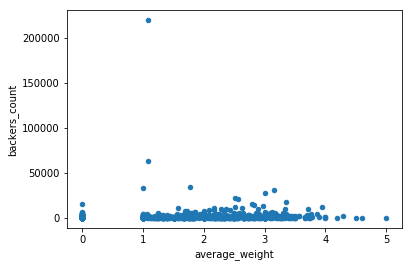

In [62]:
merged.plot(x='average_weight', y='backers_count', kind='scatter')

In [33]:
merged2 = merged.loc[:, ['name', 'goal', 'pledged', 'percentage_funded', 'backers_count', 'average_rating', 'users_rated', 'total_owners', 'total_wanters', 'total_comments', 'average_weight']]

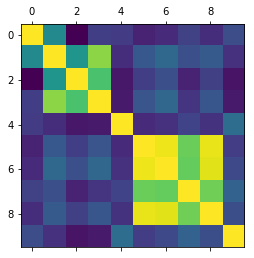

In [34]:
plt.matshow(merged2.corr())

In [35]:
len(merged2)

1249

In [51]:
lr = LinearRegression()
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

In [73]:
Xt = merged2.loc[0:800, ['goal', 'pledged', 'percentage_funded', 'backers_count', 'total_owners', 'average_weight']].values
yt = merged2.loc[0:800, ['average_rating']].values.astype(int)
zt = numpy.ravel(yt)

In [91]:
lr.fit(Xt, zt)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [92]:
Xs = merged2.loc[801:1606, ['goal', 'pledged', 'percentage_funded', 'backers_count', 'total_owners', 'average_weight']].values
ys = merged2.loc[801:1606, ['average_rating']].values.astype(int)
zs = numpy.ravel(ys)

In [93]:
Xp = merged2.loc[801:801, ['goal', 'pledged', 'percentage_funded', 'backers_count', 'total_owners', 'average_weight']].values

In [96]:
lr.predict(Xp)

array([4.95182854])

In [95]:
merged2.loc[801:801, ['average_rating']].values

array([[7.35533]])

In [97]:
lr.score(Xs, zs)

0.0010779215047729274